## 1. Import libraries 

In [1]:
import pandas as pd

import matplotlib. pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 2. Data collection

In [2]:
df_train = pd.read_csv(r'C:\Users\sawaled\Desktop\Personal\data\Assignement_12_Naive Bayes\SalaryData_Train.csv')
df_train.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### ========================================================================================

## 3. Data Understanding and Preparation

In [3]:
df_train.shape

(30161, 14)

In [4]:
df_train.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [5]:
# Segregating data based on datatype

cat = [i for i in df_train.columns if df_train[i].dtypes == 'object']

print('Numbers of Categorical data tyoe variables are: ', len(cat))
print('\n\nCategorical variables are:\n', cat)

Numbers of Categorical data tyoe variables are:  9


Categorical variables are:
 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [6]:
cat

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native',
 'Salary']

In [7]:
df_train[cat].isna().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
Salary           0
dtype: int64

In [8]:
# From below part of EDA, we can notice that there are no missing or NaN values in dataset

for i in cat:
    print(df_train[i].value_counts())

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other

In [9]:
for i in cat:
    print(i,'contains', len(df_train[i].unique()), 'labels')

workclass contains 7 labels
education contains 16 labels
maritalstatus contains 7 labels
occupation contains 14 labels
relationship contains 6 labels
race contains 5 labels
sex contains 2 labels
native contains 40 labels
Salary contains 2 labels


In [10]:
# Segregating data based on datatype

num = [i for i in df_train.columns if df_train[i].dtypes != 'object']

print('Numbers of Numerical data tyoe variables are: ', len(num))
print('\n\nNumerical variables are:\n', num)

Numbers of Numerical data tyoe variables are:  5


Numerical variables are:
 ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [11]:
df_train[num].isna().sum()

age             0
educationno     0
capitalgain     0
capitalloss     0
hoursperweek    0
dtype: int64

In [12]:
X_train = df_train.drop(columns= 'Salary', axis=1)
y_train = df_train[['Salary']]

In [13]:
X_train = pd.get_dummies(data=X_train, columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

In [14]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train.iloc[:,[0,1,2,3,4]] = scaler.fit_transform(X_train.iloc[:,[0,1,2,3,4]])
X_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.105263,0.75,2174.0,0.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.684211,0.75,0.0,0.0,-5.4,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.052632,-0.25,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.842105,-0.75,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.473684,0.75,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train.shape, y_train.shape

((30161, 102), (30161, 1))

### ========================================================================================

## 4. Model Building and Model training

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [17]:
y_train_pred = model.predict(X_train)

## 5. Model Evaluation (Train data)

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [19]:
accuracy_score(y_train,y_train_pred)

0.8014323132522131

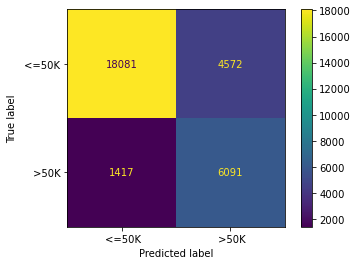

In [30]:
plot_confusion_matrix(estimator= model,X= X_train, y_true= y_train)

### =======================================================================================

## 6. Test data (Data collection, preparation, prediction)

In [20]:
df_test = pd.read_csv(r'C:\Users\sawaled\Desktop\Personal\data\Assignement_12_Naive Bayes\SalaryData_Test.csv')
df_test.head(5)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [21]:
X_test = df_test.drop(columns= 'Salary', axis=1)
y_test = df_test[['Salary']]

In [22]:
X_test = pd.get_dummies(data=X_test, columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])

In [23]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_test.iloc[:,[0,1,2,3,4]] = scaler.fit_transform(X_test.iloc[:,[0,1,2,3,4]])
X_test.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,-0.60,-0.75,0.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.05,-0.25,0.0,0.0,2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.45,0.50,0.0,0.0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.35,0.00,7688.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.15,-1.00,0.0,0.0,-2.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [24]:
X_test.shape, y_test.shape

((15060, 102), (15060, 1))

In [25]:
y_test_pred = model.predict(X_test)

In [26]:
accuracy_score(y_test,y_test_pred)

0.800199203187251

In [27]:
confusion_matrix(y_test,y_test_pred)

array([[9024, 2336],
       [ 673, 3027]], dtype=int64)

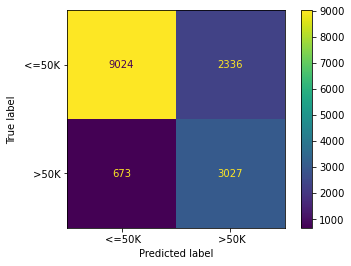

In [29]:
plot_confusion_matrix(estimator= model,X= X_test, y_true= y_test)

### ========================================================================================